<a href="https://colab.research.google.com/github/RohanNemade/Microbes-Classifier/blob/main/Microbe_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## RUN ONLY ONCE ##

## To extract files from a zipfile in Gdrive to a folder in Gdrive
"""
import zipfile
zip_ref = zipfile.ZipFile("/content/drive/My Drive/Data Science/microbes_images (labelled).zip", 'r')
zip_ref.extractall("/content/drive/My Drive/Data Science/Images_all")
zip_ref.close()
"""

In [ ]:
## Dealing with the labels first
import pandas as pd
labels = pd.read_csv("/content/drive/My Drive/Data Science/labels.csv")
img_list = list(labels["id"])
label_list = list(labels["label"])
print(labels.head())
print(img_list)
print(len(img_list))
print(label_list)

       id  label
0  f1.png     10
1  f2.png     13
2  f3.png      7
3  f4.png      7
4  f5.png      7
['f1.png', 'f2.png', 'f3.png', 'f4.png', 'f5.png', 'f6.png', 'f7.png', 'f8.png', 'f9.png', 'f10.png', 'f11.png', 'f12.png', 'f13.png', 'f14.png', 'f15.png', 'f16.png', 'f17.png', 'f18.png', 'f19.png', 'f20.png', 'f21.png', 'f22.png', 'f23.png', 'f24.png', 'f25.png', 'f26.png', 'f27.png', 'f28.png', 'f29.png', 'f30.png', 'f31.png', 'f32.png', 'f33.png', 'f34.png', 'f35.png', 'f36.png', 'f37.png', 'f38.png', 'f39.png', 'f40.png', 'f41.png', 'f42.png', 'f43.png', 'f44.png', 'f45.png', 'f46.png', 'f47.png', 'f48.png', 'f49.png', 'f50.png', 'f51.png', 'f52.png', 'f53.png', 'f54.png', 'f55.png', 'f56.png', 'f57.png', 'f58.png', 'f59.png', 'f60.png', 'f61.png', 'f62.png', 'f63.png', 'f64.png', 'f65.png', 'f66.png', 'f67.png', 'f68.png', 'f69.png', 'f70.png', 'f71.png', 'f72.png', 'f73.png', 'f74.png', 'f75.png', 'f76.png', 'f77.png', 'f78.png', 'f79.png', 'f80.png', 'f81.png', 'f82.png', 'f83

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [ ]:
# Converting data in the required format
x = []
raw_y = [] # raw_y is y before onehotencoding

path = "/content/drive/My Drive/Data Science/Images_all/"

for img_name in img_list:
    temp_path = path + str(img_name)
    image = cv2.resize(cv2.imread(temp_path, cv2.IMREAD_GRAYSCALE), (128,128))
    x.append(image)
    string = img_name
    string = string[1:-4]
    raw_y.append(label_list[int(string) - 1])

x = np.array(x)

In [ ]:
# One hot encoding y
y = []
print(raw_y)
print(max(raw_y), min(raw_y))
for i in range(len(raw_y)):
    num = raw_y[i] - 1
    temp = [0] * 14
    temp[num] = 1
    y.append(temp)

y = np.array(y)
print(y)

[10, 13, 7, 7, 7, 10, 5, 3, 8, 8, 12, 1, 12, 4, 6, 2, 7, 7, 3, 7, 10, 8, 6, 13, 4, 12, 3, 12, 6, 3, 10, 4, 13, 13, 14, 3, 2, 14, 2, 4, 2, 14, 3, 13, 8, 14, 10, 10, 6, 1, 6, 8, 3, 13, 7, 11, 11, 2, 1, 11, 5, 13, 7, 6, 9, 7, 9, 13, 14, 1, 4, 7, 14, 4, 8, 11, 14, 1, 14, 4, 8, 12, 4, 13, 10, 13, 10, 6, 2, 2, 12, 6, 8, 4, 6, 14, 5, 4, 4, 13, 9, 9, 4, 3, 1, 13, 1, 4, 10, 14, 14, 1, 9, 8, 7, 1, 6, 5, 4, 5, 4, 10, 12, 2, 1, 11, 12, 5, 10, 4, 8, 9, 8, 4, 1, 2, 2, 5, 1, 1, 13, 11, 9, 7, 6, 9, 5, 12, 8, 13, 11, 10, 8, 8, 8, 14, 3, 12, 3, 14, 7, 8, 6, 7, 10, 7, 10, 8, 12, 8, 4, 1, 13, 4, 7, 7, 4, 12, 13, 14, 12, 13, 1, 8, 9, 12, 8, 13, 1, 8, 2, 8, 9, 14, 5, 11, 4, 3, 6, 13, 14, 5, 9, 13, 9, 7, 7, 13, 5, 9, 13, 6, 7, 10, 5, 5, 2, 3, 1, 5, 1, 4, 1, 4, 13, 9, 5, 12, 9, 1, 3, 13, 13, 3, 7, 14, 12, 13, 3, 7, 7, 2, 8, 3, 13, 14, 1, 12, 5, 9, 14, 8, 8, 13, 5, 10, 1, 7, 13, 1, 13, 7, 13, 5, 7, 14, 13, 2, 11, 10, 3, 8, 12, 10, 6, 5, 2, 13, 13, 13, 5, 1, 5, 9, 12, 14, 3, 8, 7, 1, 10, 9, 7, 3, 9, 7, 5, 5, 14

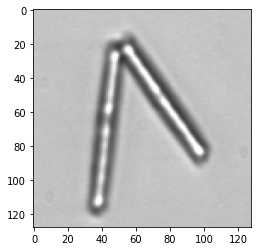

In [ ]:
# Conforming if everything is correct
plt.imshow(x[546], cmap='gray', vmin=0, vmax=255)
plt.show()

In [ ]:
x = x.reshape(10600,128,128,1)  # 4-D input for keras format = (samples_in dataset, image_height, image_width, number_of_channels)
x.shape

(10600, 128, 128, 1)

In [ ]:
# Normalizing inputs
x = x/255.0 
# x = x/127.5 - 1

In [ ]:
# Splitting the dataset in training set and validation set (80 - 20 split in this case)
x_train = x[0 : 8480]
x_val = x[8480 :]
y_train = y[0 : 8480]
y_val = y[8480 :] 
# We split directly since the dataset is already randomly arranged

In [ ]:
# Saving the variables 
import pickle
pickle.dump([x_train, x_val, y_train, y_val], open("/content/drive/My Drive/Data Science/program files/xy_vars.p", "wb"))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, BatchNormalization, MaxPooling2D

In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), input_shape=(128,128,1), activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(128, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(256, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Conv2D(512, (3, 3), padding='same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2,2)))

model.add(Flatten()) 

model.add(Dense(4608, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(512, activation='relu'))
model.add(Dense(14, activation='softmax'))

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 64)      640       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 63, 63, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 128)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 31, 31, 256)       295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 512)       1

In [ ]:
model.save("/content/drive/My Drive/Data Science/program files")

In [ ]:
#################################################################################

## Here we change runtime from CPU to GPU / TPU for faster execution ##

#################################################################################

In [ ]:
import keras
import pickle

In [ ]:
# load variables
x_train, x_val, y_train, y_val = pickle.load(open("/content/drive/My Drive/Data Science/program files/xy_vars.p","rb"))

In [ ]:
# load model
model = keras.models.load_model('/content/drive/My Drive/Data Science/program files')

In [ ]:
model.fit(x_train, y_train, batch_size=64, epochs=10, validation_data=(x_val, y_val)) # first 10 epoch on batch_size = 64

Epoch 1/10
133/133 [==============================] - 29s 216ms/step - loss: 2.2181 - accuracy: 0.2195 - val_loss: 1.3658 - val_accuracy: 0.5108
Epoch 2/10
133/133 [==============================] - 27s 206ms/step - loss: 1.0698 - accuracy: 0.6291 - val_loss: 0.9316 - val_accuracy: 0.6840
Epoch 3/10
133/133 [==============================] - 27s 206ms/step - loss: 0.6888 - accuracy: 0.7697 - val_loss: 0.7644 - val_accuracy: 0.7415
Epoch 4/10
133/133 [==============================] - 28s 207ms/step - loss: 0.4775 - accuracy: 0.8390 - val_loss: 0.4791 - val_accuracy: 0.8519
Epoch 5/10
133/133 [==============================] - 28s 207ms/step - loss: 0.3639 - accuracy: 0.8791 - val_loss: 0.4071 - val_accuracy: 0.8651
Epoch 6/10
133/133 [==============================] - 28s 207ms/step - loss: 0.2708 - accuracy: 0.9087 - val_loss: 0.3725 - val_accuracy: 0.8792
Epoch 7/10
133/133 [==============================] - 27s 206ms/step - loss: 0.2295 - accuracy: 0.9226 - val_loss: 0.4413 - val_ac

In [ ]:
model.fit(x_train, y_train, batch_size=256, epochs=10, validation_data=(x_val, y_val)) # next 10 epochs on batch_size = 256

Epoch 1/10
34/34 [==============================] - 23s 690ms/step - loss: 0.0712 - accuracy: 0.9783 - val_loss: 0.3994 - val_accuracy: 0.9005
Epoch 2/10
34/34 [==============================] - 23s 677ms/step - loss: 0.0275 - accuracy: 0.9908 - val_loss: 0.4485 - val_accuracy: 0.9033
Epoch 3/10
34/34 [==============================] - 23s 677ms/step - loss: 0.0215 - accuracy: 0.9926 - val_loss: 0.4705 - val_accuracy: 0.9038
Epoch 4/10
34/34 [==============================] - 23s 679ms/step - loss: 0.0201 - accuracy: 0.9929 - val_loss: 0.4965 - val_accuracy: 0.8892
Epoch 5/10
34/34 [==============================] - 23s 678ms/step - loss: 0.0185 - accuracy: 0.9937 - val_loss: 0.5094 - val_accuracy: 0.9024
Epoch 6/10
34/34 [==============================] - 23s 679ms/step - loss: 0.0066 - accuracy: 0.9983 - val_loss: 0.5659 - val_accuracy: 0.8995
Epoch 7/10
34/34 [==============================] - 23s 678ms/step - loss: 0.0068 - accuracy: 0.9976 - val_loss: 0.5712 - val_accuracy: 0.9066